In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./datasets/BeerWineLiquor.csv')

In [5]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [7]:
df.columns = ['ds', 'y']

In [8]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [9]:
df['ds'] = pd.to_datetime(df['ds'])

In [12]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [13]:
m = Prophet()

In [14]:
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# Placeholder
future = m.make_future_dataframe(periods=24, freq='MS')

In [16]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [18]:
forecast = m.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1771.312291,1143.519623,1475.252024,1771.312291,1771.312291,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,0.0,0.0,0.0,1309.659254
1,1992-02-01,1774.175336,1188.856834,1516.943552,1774.175336,1774.175336,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,0.0,0.0,0.0,1347.059466
2,1992-03-01,1776.853668,1439.865139,1766.115379,1776.853668,1776.853668,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,0.0,0.0,0.0,1598.062912
3,1992-04-01,1779.716713,1416.774255,1748.722568,1779.716713,1779.716713,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,0.0,0.0,0.0,1583.405020
4,1992-05-01,1782.487401,1655.650220,1997.188486,1782.487401,1782.487401,44.675263,44.675263,44.675263,44.675263,44.675263,44.675263,0.0,0.0,0.0,1827.162664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.823239,5083.283681,5397.517686,5189.216115,5211.440546,39.703050,39.703050,39.703050,39.703050,39.703050,39.703050,0.0,0.0,0.0,5240.526290
344,2020-09-01,5216.882602,4927.398213,5249.890648,5204.228954,5228.247164,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,0.0,0.0,0.0,5083.515075
345,2020-10-01,5232.423922,5027.885219,5343.170827,5218.272029,5244.698016,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,0.0,0.0,0.0,5189.023726
346,2020-11-01,5248.483285,5169.770080,5486.885168,5233.275601,5261.871930,86.835312,86.835312,86.835312,86.835312,86.835312,86.835312,0.0,0.0,0.0,5335.318596


In [20]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1143.519623,1475.252024,1309.659254
1,1992-02-01,1188.856834,1516.943552,1347.059466
2,1992-03-01,1439.865139,1766.115379,1598.062912
3,1992-04-01,1416.774255,1748.722568,1583.405020
4,1992-05-01,1655.650220,1997.188486,1827.162664
...,...,...,...,...
343,2020-08-01,5083.283681,5397.517686,5240.526290
344,2020-09-01,4927.398213,5249.890648,5083.515075
345,2020-10-01,5027.885219,5343.170827,5189.023726
346,2020-11-01,5169.770080,5486.885168,5335.318596


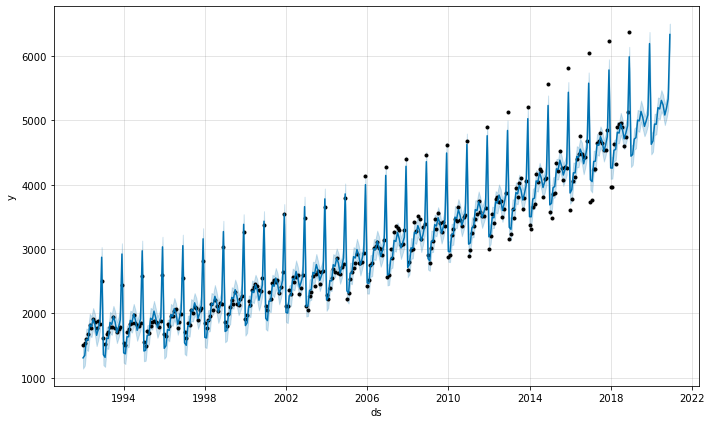

In [27]:
m.plot(forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]);

(16071.0, 18628.0)

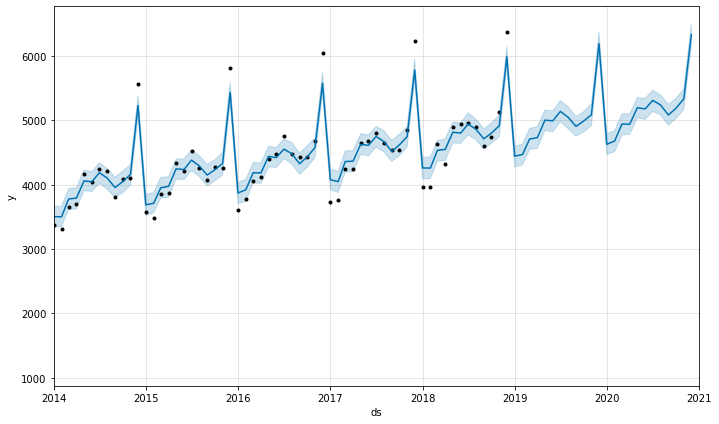

In [44]:
m.plot(forecast)
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2021-01-01'))

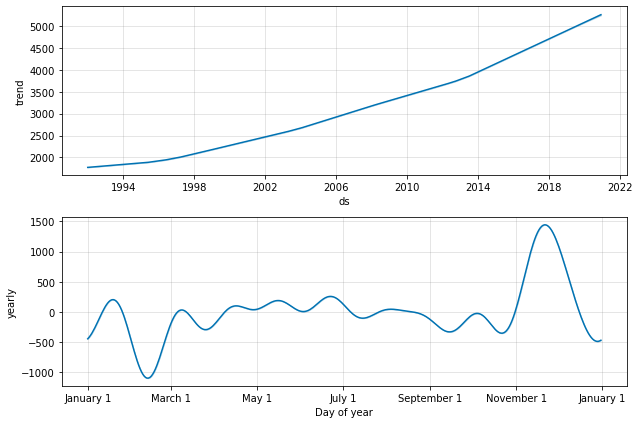

In [52]:
m.plot_components(forecast);

**Evaluation**

In [2]:
df = pd.read_csv('./datasets/Miles_Traveled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [6]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<AxesSubplot:xlabel='ds'>

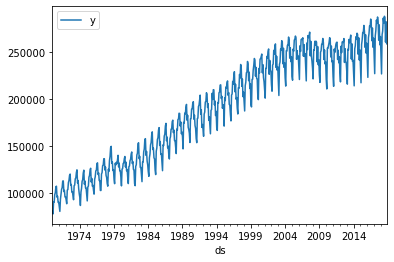

In [7]:
df.plot(x='ds', y='y')

In [8]:
len(df)

588

In [9]:
train = df.iloc[:576]
test = df.iloc[576:]

In [10]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='ds'>

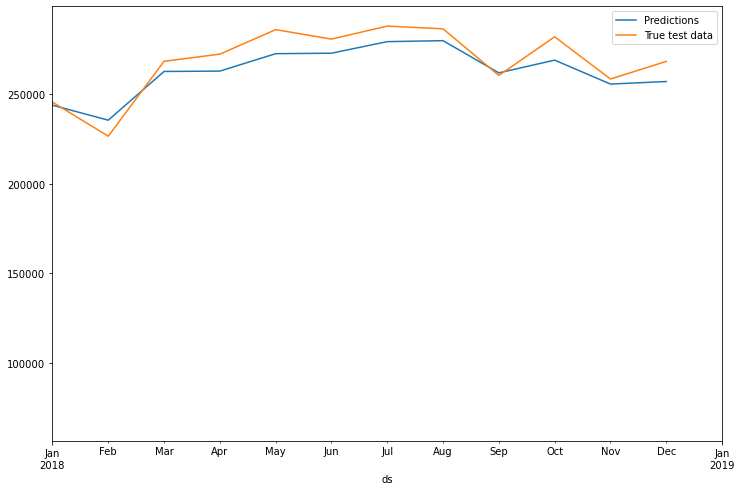

In [13]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
test.plot(x='ds', y='y', label='True test data', legend=True, ax=ax, xlim=('2018-01-01', '2019-01-01'))

In [14]:
from statsmodels.tools.eval_measures import rmse

In [15]:
predictions = forecast.iloc[-12:]['yhat']

In [16]:
predictions

576    243969.272997
577    235604.734139
578    262807.783513
579    263016.187323
580    272739.162173
581    272999.948918
582    279459.160887
583    280000.766709
584    262025.915409
585    269134.754137
586    255767.524882
587    257193.315841
Name: yhat, dtype: float64

In [17]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [18]:
rmse(predictions, test['y'])

8524.084735454997

In [19]:
test.mean()

<ipython-input-19-a428e52fa3ce>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    268739.666667
dtype: float64

In [20]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [21]:
# Initial
initial = 5 * 365
initial = str(initial) + ' days'

# Period
period = 5 * 365
period = str(period) + ' days'

# Horizon
horizon = 365
horizon = str(horizon) + ' days'

In [22]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [23]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087397,107081.257574,109942.491239,102445.0,1976-12-11
1,1977-02-01,102996.111518,101620.671369,104339.112450,102416.0,1976-12-11
2,1977-03-01,118973.318133,117497.433867,120466.470996,119960.0,1976-12-11
3,1977-04-01,120612.923726,119147.656357,121992.162227,121513.0,1976-12-11
4,1977-05-01,127883.031847,126448.855866,129251.186913,128884.0,1976-12-11


In [24]:
len(df_cv)

108

In [25]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.440480e+07,4940.121674,4543.226142,0.027839,0.023430,0.4
1,53 days,2.189073e+07,4678.753115,4275.518107,0.025071,0.023430,0.4
2,54 days,1.845424e+07,4295.839617,3751.881988,0.020184,0.022341,0.5
3,55 days,2.353986e+07,4851.789757,4286.500962,0.023332,0.023430,0.4
4,57 days,2.121071e+07,4605.508636,4011.466093,0.021541,0.022341,0.5
...,...,...,...,...,...,...,...
94,360 days,1.844636e+07,4294.922982,3768.283191,0.019668,0.019608,0.5
95,361 days,1.755041e+07,4189.321092,3487.275332,0.018267,0.019006,0.5
96,362 days,3.171401e+07,5631.519540,4404.117322,0.022028,0.024617,0.4
97,364 days,3.002471e+07,5479.480904,4245.018294,0.021435,0.021653,0.5


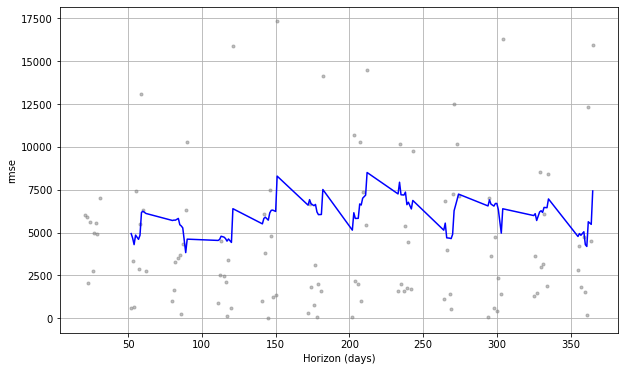

In [27]:
plot_cross_validation_metric(df_cv, metric='rmse');

**Trend**

In [28]:
df = pd.read_csv('./datasets/HospitalityEmployees.csv')

In [29]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

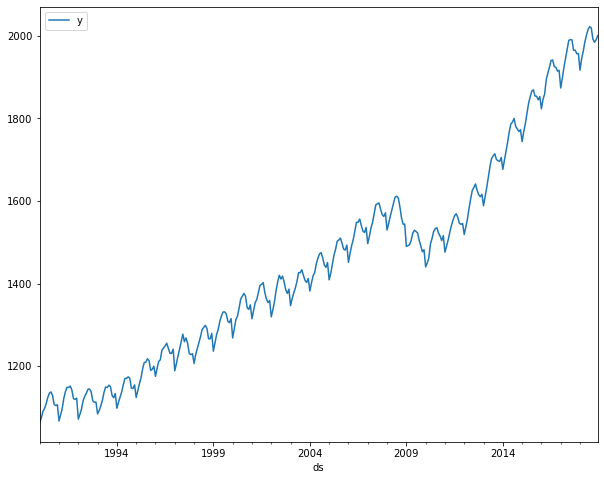

In [32]:
df.plot(x='ds', y='y', figsize=(10, 8))

In [33]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
from fbprophet.plot import add_changepoints_to_plot

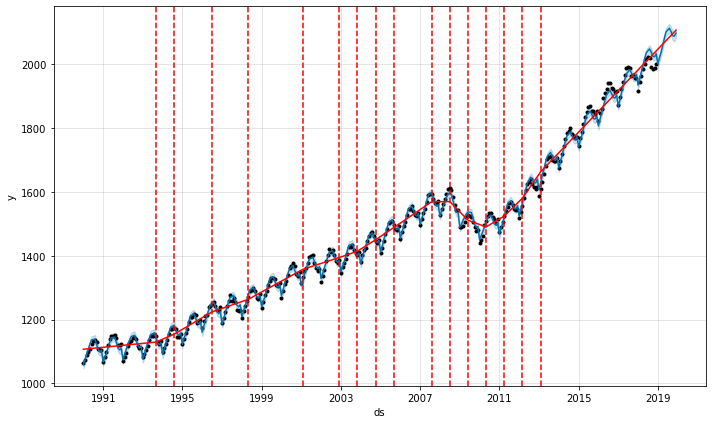

In [35]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)